### Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import re
import nltk

### Load Dataset

In [2]:
os.chdir('E:\\prasad\\practice\\NLP\\dataset\\fake-news')

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.shape

(20800, 5)

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

### Visualize NA Values

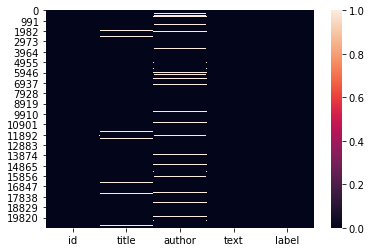

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


### Drop NA Values

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(18285, 5)

In [10]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

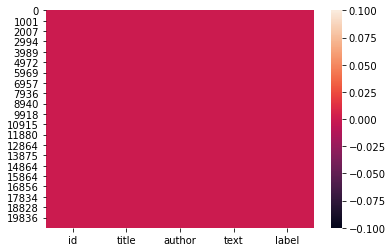

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


### Reset Index

In [13]:
df.reset_index(inplace=True)

In [14]:
df.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
messages=df.copy()

In [16]:
messages.shape

(18285, 6)

In [17]:
messages['title'][9]

'BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage'

In [18]:
messages['title'][5]

'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart'

### Cleaning the texts

In [19]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
ps=PorterStemmer()

In [20]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [21]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [22]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [23]:
messages['title'][5]

'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart'

In [24]:
corpus[5]

'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart'

### Creating the Bag of Words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [26]:
# Applying Countvectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [27]:
X=cv.fit_transform(corpus).toarray()
X.shape

(18285, 5000)

In [28]:
y=messages['label']
y.shape

(18285,)

### Divide the dataset into Train and Test

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14628, 5000), (3657, 5000), (14628,), (3657,))

In [30]:
cv.get_feature_names()[0:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [31]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

### Create DataFrame using New Feature Names

In [32]:
count_df=pd.DataFrame(X,columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X.shape

(18285, 5000)

#### Create Function for Model Building

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [35]:
def check_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('Accuracy Score:',accuracy_score(y_test,y_pred),'\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred),'\n')
    print('Classification Report:')
    print(classification_report(y_test,y_pred))

In [36]:
check_model(MultinomialNB(),X_train,X_test,y_train,y_test)

Accuracy Score: 0.8944490019141372 

Confusion Matrix:
[[1851  231]
 [ 155 1420]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2082
           1       0.86      0.90      0.88      1575

    accuracy                           0.89      3657
   macro avg       0.89      0.90      0.89      3657
weighted avg       0.90      0.89      0.89      3657



In [37]:
# LogisticRegression
# check_model(LogisticRegression(),X_train,X_test,y_train,y_test)

In [38]:
# RandomForestClassifier
# check_model(RandomForestClassifier(),X_train,X_test,y_train,y_test)

In [39]:
# DecisionTreeClassifier
# check_model(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

In [40]:
# SVC
# check_model(SVC(),X_train,X_test,y_train,y_test)

In [41]:
# KNeighborsClassifier
# check_model(KNeighborsClassifier(),X_train,X_test,y_train,y_test)

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [43]:
check_model(PassiveAggressiveClassifier(),X_train,X_test,y_train,y_test)

Accuracy Score: 0.9105824446267432 

Confusion Matrix:
[[1883  199]
 [ 128 1447]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2082
           1       0.88      0.92      0.90      1575

    accuracy                           0.91      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.91      0.91      0.91      3657

